# Experimentation: Data Pre-Processing
---

In [1]:
# Import libraries
import sys
sys.path.append("..")

from monai.config import print_config
from src.preprocessing import get_transforms, get_datasets, get_dataloaders

import torch
import matplotlib.pyplot as plt

print_config()

# Set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

MONAI version: 1.3.0
Numpy version: 1.26.4
Pytorch version: 2.2.1
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 865972f7a791bf7b42efbcd87c8402bd865b329e
MONAI __file__: c:\Users\<username>\AppData\Local\anaconda3\envs\torch-gpu\Lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: 5.3.0
Nibabel version: 5.2.1
scikit-image version: NOT INSTALLED or UNKNOWN VERSION.
scipy version: 1.12.0
Pillow version: 10.2.0
Tensorboard version: 2.16.2
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.17.1
tqdm version: 4.66.2
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.8
pandas version: 2.2.1
einops version: 0.7.0
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about ins

In [2]:
# Get transforms
transform = get_transforms()

# Get datasets
train_ds, val_ds = get_datasets(root_dir="../data", collection="HCC-TACE-Seg", transform=transform, download_len=5, val_frac=0.2)

# Get dataloaders
train_loader, val_loader = get_dataloaders(train_ds, val_ds, batch_size=1)

# Check length of datasets and dataloaders
print(train_ds.get_indices(), val_ds.get_indices())
print(len(train_loader), len(val_loader))

2024-04-22 09:35:02,985 - INFO - Expected md5 is None, skip md5 check for file ..\data\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip.
2024-04-22 09:35:02,986 - INFO - File exists: ..\data\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip, skipped downloading.
2024-04-22 09:35:02,986 - INFO - Writing into directory: ..\data\HCC-TACE-Seg\raw\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.
2024-04-22 09:35:03,545 - INFO - Expected md5 is None, skip md5 check for file ..\data\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip.
2024-04-22 09:35:03,547 - INFO - File exists: ..\data\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip, skipped downloading.
2024-04-22 09:35:03,549 - INFO - Writing into directory: ..\data\HCC-TACE-Seg\HCC_017\300\image.
2024-04-22 09:35:03,865 - INFO - Expected md5 is None, skip md5 check for file ..\data\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.208

In [3]:
# Sample a batch of data from the dataloader
batch = next(iter(train_loader))

# Separate the image and segmentation from the batch
image, seg = batch["image"], batch["seg"]

print(image.shape, seg.shape)

Data statistics:
Type: <class 'monai.data.meta_tensor.MetaTensor'> torch.float32
Shape: torch.Size([1, 512, 512, 64])
Value range: (-2048.0, 3271.0)
Data statistics:
Type: <class 'monai.data.meta_tensor.MetaTensor'> torch.float32
Shape: torch.Size([5, 512, 512, 64])
Value range: (0.0, 1.0)
torch.Size([1, 1, 512, 512, 64]) torch.Size([1, 5, 512, 512, 64])


torch.Size([1, 5, 512, 512]) torch.Size([1, 1, 512, 512, 64])


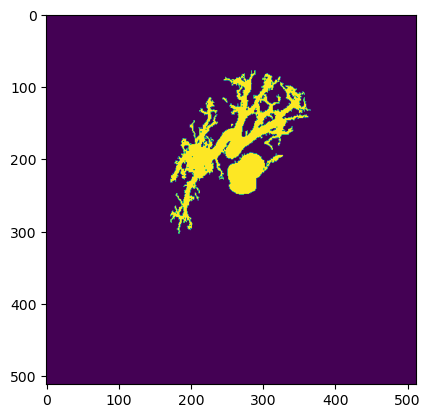

In [4]:
from monai.transforms import HistogramNormalize

seg_mask = torch.max(seg, dim=4, keepdim=False)[0]


mask = seg_mask[0, 2, :, :]
print(seg_mask.shape, image.shape)

plt.imshow(mask)

normalize = HistogramNormalize(mask=mask)

#image = normalize(image)

torch.Size([512, 512]) torch.Size([512, 512])


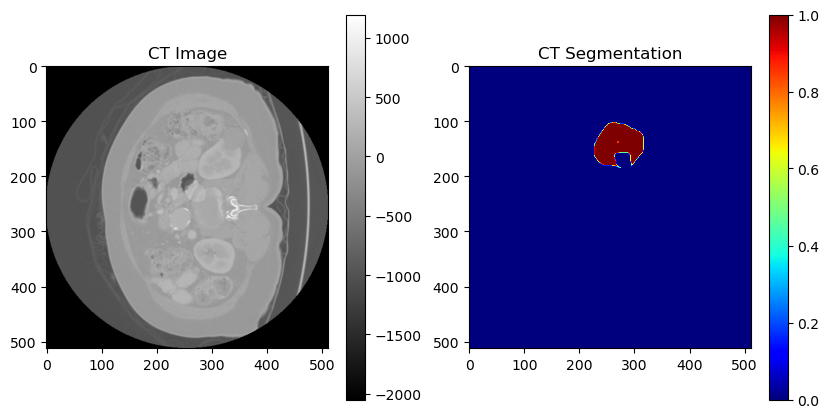

In [6]:
slice_idx =60

# Sample a slice from the image
CT_slice = image[0, 0, :, :, slice_idx].cpu()

# Get the maximum segmentation class for each pixel in the slice
CT_seg_slice = seg[0,0, :, :, slice_idx].cpu()

print(CT_slice.shape, CT_seg_slice.shape)

# Plot the image and segmentation slice as a subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
im = axes[0].imshow(CT_slice, cmap="gray")  # Set color limits to [-125, 225] HU
axes[0].set_title("CT Image")
fig.colorbar(im, ax=axes[0])  # Add a colorbar to the CT image
axes[1].imshow(CT_seg_slice, cmap="jet")
axes[1].set_title("CT Segmentation")
plt.colorbar(mappable=axes[1].imshow(CT_seg_slice, cmap='jet'), ax=axes[1])
plt.show()